In [ ]:
##################################################### OpenCV-Python 기초 사용법 ###################################################################

In [1]:
'''Opencv 영상 데이터 자료형
cv2.CV_8U --- numpy.uint8 --- 8비트 부호 없는 정수
등등'''

'Opencv 영상 데이터 자료형\ncv2.CV_8U --- numpy.uint8 --- 8비트 부호 없는 정수\n등등'

In [3]:
#지정한크기로 새 영상 생성하기

'''
numpy.empty(shape, dtype=float, ...) -> arr
numpy.zeros(shape, dtype=float, ...) -> arr
numpy.ones(shape, dtype=None, ...) -> arr
numpy.full(shape, fill_value, dtype=None, ...) -> arr
'''

'\nnumpy.empty(shape, dtype=float, ...) -> arr\nnumpy.zeros(shape, dtype=float, ...) -> arr\nnumpy.ones(shape, dtype=None, ...) -> arr\nnumpy.full(shape, fill_value, dtype=None, ...) -> arr\n'

In [215]:
# 빈 지정 색 배경 창 만들기
import numpy
a = numpy.full((960,640,3), (0,0,0), dtype=numpy.uint8)

import cv2
# img1 = cv2.imshow('img1', a)
# cv2.waitKey()

# Url 이미지 가져오기
import cv2
import numpy as np

cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    img1 = img.copy() #(960, 640, 3)
    # 슬라이싱 [세로],[가로]
    face = img1[210:850,380:555] #[남자 얼굴 ROI 210:390, 380:530] (face.shape >> (230,160,3))
    
    # 리사이즈
    # img2 = cv2.resize(img2,(120,193))
    
    # ROI 다루기
    crop = img1.copy()
    crop[210:850,380:555] = (0,0,0) #ROI 영역 흑백 처리

    # 합성
    a[210:850, 380:555] = img1[210:850, 380:555].copy()

    # 컬러 변환
    img3 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    a = cv2.cvtColor(a,cv2.COLOR_RGB2BGR)

    #cv2.copyTo 예시 (src,mask,dst)
    img4 = cv2.copyTo(img1,crop,a) #src와 mask 크기는 같아야하고 src와 dst는 타입(channel 수)이 같아야함.

    # 불리언 방식 합성
    # a[crop > 0] = img1[crop > 0]

    # #색 분리
    # b = img1[:, :, 0]
    # g = img1[:, :, 1]
    # r = img1[:, :, 2]



    # cv2.imshow("원본이미지",img1)
    # cv2.imshow("얼굴 roi",face)
    # cv2.imshow("mask",crop)
    # cv2.imshow("불리언 방식"",a)
    cv2.imshow("copyTo",img4)
    cv2.waitKey()
    cv2.destroyAllWindows

In [216]:
# img1[:,:] = (0,255,255)
h, w = img1.shape[:2]

# 자르기
crop = img1[int(h*0.2):h, int(w*0.2):w]

# 직선 그리기 (img, pt1, pt2 , color , thickness)
img1 = cv2.line(img1, (350,300), (550,300), (0,0,255), 5)
img1 = cv2.line(img1, (450,400), (450,200), (0,0,255), 5)
# 사각형 그리기 (img, pt1, pt2, color, thickness, lineType=None, shift=None) thickness 부분에 -1 같은 음수를 지정하면 '채우기', 직선 그리기는 에러
img1 = cv2.rectangle(img1, (635,890),(310,210), (255,0,255), 5) 
# 원 그리기
img1 = cv2.circle(img1,(450,300), 100, (255,0,0),3 , cv2.LINE_AA)
# 문자열 출력 (img, text, org, fontFace, fontScale,color, thickness=None, lineType=None, bottomLeftOrigin=None)
img1 = cv2.putText(img1, 'Test Image', (40,150), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,0), 5, cv2.LINE_AA)



cv2.imshow('img1',img1)
cv2.waitKey()
cv2.destroyAllWindows

<function destroyAllWindows>

In [218]:
# 카메라와 동영상 처리하기
# isOpened() , grab() / retrieve() , open() , read() , get() / set() , release()    ->>> frame

import pafy
import cv2
 
url = "https://www.youtube.com/watch?v=gdZLi9oWNZg"
video = pafy.new(url)

print("video title : {}".format(video.title))  # 제목
print("video rating : {}".format(video.rating))  # 평점
print("video viewcount : {}".format(video.viewcount))  # 조회수
print("video author : {}".format(video.author))  # 저작권자
print("video length : {}".format(video.length))  # 길이
print("video duration : {}".format(video.duration))  # 길이
print("video likes : {}".format(video.likes)) # 좋아요
print("video dislikes : {}".format(video.dislikes)) #싫어요

best = video.getbest(preftype="mp4")
print("best resolution : {}".format(best.resolution))

cap = cv2.VideoCapture(best.url) 
 
# 동영상 크기(frame정보)를 읽어옴
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
# 동영상 프레임을 캡쳐
frameRate = int(cap.get(cv2.CAP_PROP_FPS))
 
frame_size = (frameWidth, frameHeight)
print('frame_size={}'.format(frame_size))
print('fps={}'.format(frameRate))
 
# cv2.VideoWriter_fourcc(*'코덱')
# codec 및 녹화 관련 설정
# 인코딩 방식을 설정
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#fourcc = cv2.VideoWriter_fourcc(*'DIVX')
#fourcc = cv2.VideoWriter_fourcc(*'MPEG')
#fourcc = cv2.VideoWriter_fourcc(*'X264')
 
out1Path = 'data/recode1.mp4'
out2Path = 'data/recode2.mp4'
 
# 영상 저장하기
# out1Path : 저장할 파일명
# fourcc : frame 압축 관련 설정(인코딩, 코덱 등)
# frameRate : 초당 저장할 frame
# frame_size : frame 사이즈(가로, 세로)
# isColor : 컬러 저장 여부
out1 = cv2.VideoWriter(out1Path, fourcc, frameRate, frame_size)
out2 = cv2.VideoWriter(out2Path, fourcc, frameRate, frame_size)

while True:
    # 한 장의 이미지를 가져오기
    # 이미지 -> frame
    # 정상적으로 읽어왔는지 -> retval
    retval, frame = cap.read()
    if not(retval):
        break  # 프레임정보를 정상적으로 읽지 못하면 while문을 빠져나가기
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)	# 회색으로 컬러 변환
    edges = cv2.Canny(gray, 100, 200)	# Canny함수로 엣지 따기
    
    # 동영상 파일에 쓰기
    out1.write(frame)
    out2.write(edges)
    
    # 모니터에 출력
    cv2.imshow('frame', frame)
    cv2.imshow('edges', edges)
    
    key = cv2.waitKey(frameRate)  # frameRate msec동안 한 프레임을 보여준다
    
    # 키 입력을 받으면 키값을 key로 저장 -> esc == 27
    if key == 27:
        break
        
if cap.isOpened():
    cap.release()
    out1.release()
    out2.release()
    
cv2.destroyAllWindows()

video title : BTS (방탄소년단) 'Dynamite' Official MV
video rating : 4.7914534
video viewcount : 699547565
video author : Big Hit Labels
video length : 223
video duration : 00:03:43
video likes : 22561610
video dislikes : 1240985
best resolution : 640x360
frame_size=(640, 360)
fps=23


In [220]:
# 가장 기본 내부 카메라 가져오기

import sys
import cv2

cap = cv2.VideoCapture()
cap.open(0)

if not cap.isOpened():
    print('camera open failed!')
    sys.exit()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    cv2.imshow('frame', frame)
    if cv2.waitKey(20) == 27 : # ESC
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
'''
비디오 코덱 Fourcc
동영상 파일의 코덱, 압축 방식, 색상, 픽셀 포멧 등을 정의하는 정수
cv2.VideoWriter_fourcc(*'DIVX') - DIVX MPEG-4 코덱
cv2.VideoWriter_fourcc(*'XVID') - XVID MPEG-4 코덱
cv2.VideoWriter_fourcc(*'FMP4') - FFMPEG MPEG-4 코덱
cv2.VideoWriter_fourcc(*'X264') - H.264/AVC 코덱
cv2.VideoWriter_fourcc(*'MJPG') - Motion-JPEG 코덱
'''

"\n비디오 코덱 Fourcc\n동영상 파일의 코덱, 압축 방식, 색상, 픽셀 포멧 등을 정의하는 정수\ncv2.VideoWriter_fourcc(*'DIVX') - DIVX MPEG-4 코덱\ncv2.VideoWriter_fourcc(*'XVID') - XVID MPEG-4 코덱\ncv2.VideoWriter_fourcc(*'FMP4') - FFMPEG MPEG-4 코덱\ncv2.VideoWriter_fourcc(*'X264') - H.264/AVC 코덱\ncv2.VideoWriter_fourcc(*'MJPG') - Motion-JPEG 코덱\n"

In [226]:
import sys
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('camera open failed!')
    sys.exit()

# get() 카메라 정보 가져오기
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# set() 카메라 설정하기
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

while True:
    ret, frame = cap.read()

    if not ret: #동영상의 제일 마지막 프레임까지 가져오고 다음 프레임이 없으면 break
        break
    
    # canny
    edge = cv2.Canny(frame, 50, 150)

    cv2.imshow('frame', frame)
    cv2.imshow('edge', edge)
    if cv2.waitKey(20) == 27 : # ESC
        break

cap.release()
cv2.destroyAllWindows()

In [23]:
# 영상 저장
import sys
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('camera open failed!')
    sys.exit()

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'MJPG') # *'DIVX' == 'D','I','V','X' -> linux 재생 안됨, MJPG로 교체
delay = round(1000 / fps) # 프레임 간의 시간을 조절하기 위함.

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h)) # 소리 저장 안됨

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    inversed = ~frame # 프레임 반전
    
    edge = cv2.Canny(frame, 50, 150) # 엣지 검출
    edge_color = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    out.write(frame)
    
    cv2.imshow('frame', frame)
    # cv2.imshow('inversed', inversed)
    # cv2.imshow('edge', edge_color)

    if cv2.waitKey(20) == 27 : # ESC
        break

cap.release()
cv2.destroyAllWindows()

In [7]:
# 키보드 이벤트 처리

import sys
import cv2

cap = cv2.VideoCapture()
cap.open(0)
i = 0

if not cap.isOpened():
    print('camera open failed!')
    sys.exit()

while True:
    key = cv2.waitKey(20)
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # XOR 토글을 사용한 반전 효과
    if key == ord('i') or key == ord('I') and i == 0:
        i ^= 1
    elif i == 1:
        frame = ~frame    
    else:
        pass


    if key == ord('q'):
        break
    cv2.imshow('frame', frame)
    # 주요 특수키 코드 : 27(ESC), 13(ENTER), 9(TAB))
    # WinOS 에서 방향키, 함수키 등의 특수키 입력은 cv2.waitKeyEx() 이용

cap.release()
cv2.destroyAllWindows()

In [1]:
# 마우스 이벤트 처리

# cv2.setMouseCallback(windowName, onMouse param=None)
# onMouse: 마우스 이벤트 처리를 위한 콜백 함수 이름. 마우스 이벤트 콜백함수는 다음 형식을 따라야함.

# onMouse(event, x, y, flags, param)
# param: 콜백 함수에 전달할 데이터
# x,y: 마우스 이벤트 발생 좌표
# event: 마우스 이벤트 종류, cv2.EVENT_ ...
# flags: 마우스 이벤트 발생 시 상태. cv2.EVENT_FLAG_ ... (shift 누르고 클릭 등..)

import sys
import numpy as np
import cv2

def on_mouse(event, x,y, flags, param):
    global img, oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('LbunttonDown: {}, {}'.format(x,y))
    elif event == cv2.EVENT_LBUTTONUP:
        print('LbuttonUP: {}, {}'.format(x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            # print('Mouse_Move: {}, {}'.format(x,y))
            # cv2.circle(img, (x,y), 5, (0,0,255), -1)
            cv2.line(img, (oldx,oldy),(x,y),(0,0,255),2, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y

img = np.ones((480, 640, 3), dtype=np.uint8) * 255

cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.setMouseCallback('image', on_mouse)

cv2.waitKey()
cv2.destroyAllWindows()

LbunttonDown: 191, 138
LbuttonUP: 191, 138
LbunttonDown: 395, 167
LbuttonUP: 397, 166
LbunttonDown: 237, 249
LbuttonUP: 237, 249
LbunttonDown: 348, 263
LbuttonUP: 349, 262


In [18]:
# 트랙바 사용하기
# cv2.createTrackbar(trackbarName, windowName, value, count, onChange)
# trackbarName: 트랙바 이름
# windowName: 트랙바를 생성할 창 이름
# value: 트랙바 위치 초기갑
# count: 트랙바 최댓갑. 최솟갑은 항상 0.
# onChange: 트랙바 위치가 변경될 때마다 호출할 콜백 함수 이름. == cv2.MouseCallback
# 트랙바 이벤트 콜백 함수는 다음 형식을 따름. onChange(pos) pos는 위치갑

import numpy as numpy
import cv2

def on_level_changed(pos):
    global img

    # if pos == 16:
    #     pos -= 1
    #     img[:,:] = pos * 16 # 각 단계마다 16씩 건너뜀
    # else:
    #     img[:,:] = pos * 16

    level = pos * 16
    level = np.clip(level, 0, 255)
    img[:,:] = level

    cv2.imshow('image', img)

img = np.zeros((480, 640), np.uint8)

cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 16, on_level_changed)

cv2.waitKey()

cv2.destroyAllWindows()

In [1]:
# 연산 시간 측정 방법
# cv2.TickMeter()
# tm : cv2.TickMeter 객체
# tm.start(): 시간 측정 시작
# tm.stop(): 시간 측정 끝
# tm.reset(): 시간 측정 초기화

# tm.getTimeSec(): 측정시간을 초 단위로 반환
# tm.getTimeMilli(): 측정 시간을 밀리 초 단위로 반환
# tm.getTimeMicro(): 측정 시간을 마이크로 초 단위로 반환

import sys
import numpy as numpy
import cv2

cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    img1 = img.copy() #(960, 640, 3)

    tm = cv2.TickMeter()
    tm.start()

    edge = cv2.Canny(img1, 50, 150)

    tm.stop()
    ms = tm.getTimeMilli()

    print('경과 시간: {}ms'.format(ms))

경과 시간: 63.633300000000006ms


In [3]:
# 동영상 전환 이펙트 (동영상 합성)
# fade-in , fade-out, dissolve, 밀기, 확대 등
# 두 개의 동영상 동시 열기
# 첫 번째 동영상의 마지막 N개 프레임과 두 번째 동영상의 처음 N개 프레임을 합성
# 합성된 영상을 동영상으로 저장하기

import sys
import numpy as np
import cv2

# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture('bus_stop.mp4')
cap2 = cv2.VideoCapture('vsTest_001.mp4')

if not cap1.isOpened() or not cap2.isOpened():
    print('video open Failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정함
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)

print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)
print('FPS:', fps)

delay = int(100 / fps)

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

# 출력 동영상 객체 생성
out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))

#
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    out.write(frame1)

    cv2.imshow('frame1', frame1)
    cv2.waitKey(delay)

for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    # 옆으로 밀기 합성 - dx = 잘라 낼 위치
    # dx = int(w * i / effect_frames)
    # frame = np.zeros((h, w, 3), dtype=np.uint8)
    # frame[:, 0:dx] = frame2[:, 0:dx]
    # frame[:, dx:w] = frame1[:, dx:w]
    
    # 디졸브
    alpha = 1.0 - i /effect_frames # alpha는 0 에서 1 사이의 갑이어야함.
    frame = cv2.addWeighted(frame1, alpha, frame2, 1 - alpha, 0) # alpha와 1 - alpha가 1이 되어야함.
    

    out.write(frame)
    cv2.imshow('frame', frame)
    cv2.waitKey(delay)

for i in range(effect_frames, frame_cnt2):
    ret2, frame2 = cap2.read()

    if not ret2:
        break

    out.write(frame2)

    cv2.imshow('frame2', frame2)
    cv2.waitKey(delay)

cap1.release()
cap2.release()
cv2.destroyAllWindows()

frame_cnt1: 1421
frame_cnt2: 12954
FPS: 30.0


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [10]:
##################################################### 기본적인 영상 처리 기법 ###################################################################

In [14]:
# 영상 밝기 조절
# 화소 처리(Point Processing) - 입력 영상의 특정 좌표 픽셀 갑을 변경하여 출력 영상의 해당 좌표 픽셀 값으로 설정하는 연산
# dst(x,y) = f(src(x,y)) // f -> transfer function
# dst(x,y) = saturate(src(x,y)+n)
# n -> 양수면 밝게, 음수면 어둡게
# saturate 연산 == limit, clip .. 밝기 255가 최대인데 그 이상 갈 수 없으므로 한정

# cv2.add(src1, src2, dst=None, mask=None, dtype=None) -> dst
# src1: (입력) 첫 번째 영상 또는 스칼라
# src2: (입력) 두 번째 영상 또는 스칼라
# dst:  (출력) 덧셈 연산의 결과 영상
# mask: 마스크 영상
# dtype: 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등

import sys
import numpy as np
import cv2

#링크 이미지 가져오기
cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src = img.copy()
# src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
# dst = cv2.add(src, 100)
# dst = np.clip(src + 100.,0, 255).astype(np.uint8) # 100 뒤에 . 을 찍어서 실수 단위로 연산
dst = cv2.add(src, (50, 50, 50, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

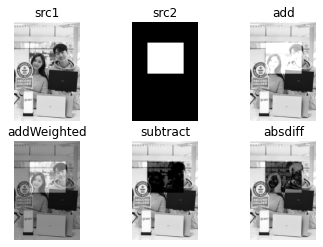

In [25]:
# 영상의 산술 및 논리 연산
# 덧셈 연산 dst(x,y) = saturate(src1(x,y) + src2(x,y))
# 덧셈 결과가 255보다 크면 픽셀 값을 255로 설정 (포화 연산) == saturate
# cv2.add(src1, src2, dst=None, mask=None, dtype=None) -> dst

# 가중치 합(weighted sum)
# dst(x,y) = saturate(alpha * src1(x,y) + beta * src2(x,y))   # alpha 와 beta 합은 1 이여야함.
# cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst

# 뺄셈 연산 dst(x,y) = saturate(src1(x,y) - src2(x,y)) # src순서 중요
# cv2.subtract(src1, src2, dst=None, mask=None, dtype=None) -> dst

# 차이 연산 dst(x,y) = |src1(x,y) - src2(x,y)| # 프레임간, 사진 간 차이를 알고 싶을 때 사용
# cv2.absdiff(src1, src2, dst=None) -> dst

# 비트 단위 연산 and, or, xor, not 연산
# cv2.bitwise_and(src1, src2, dst=None, mask=None) -> dst ... 잘 안쓰므로 나중에 찾아도 무방

import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
src2 = np.full((960,640,3), (0,0,0), dtype=np.uint8)
scr2 = cv2.rectangle(src2, (150,200),(500,500), (0,255,0), -1)

src1 = cv2.cvtColor(src1, cv2.COLOR_RGB2GRAY)
src2 = cv2.cvtColor(src2, cv2.COLOR_RGB2GRAY)

if src1 is None or src2 is None:
    print('Image load Failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1,src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')

plt.show()

In [1]:
# 컬러 영상과 색 공간
# 채널 분리
# cv2.split(m, mv=None) -> dst
# cv2.merge(mv, dst=None) -> dst
# m: 다채널 영상 (B.G.R)로 구성된 컬러 영상
# mv: 출력 영상
# dst: 출력 영상의 리스트

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()

# 컬러 영상 속성 확인
print('src1.shape:', src1.shape)
print('src1.dtype:', src1.dtype)

src_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
planes = cv2.split(src_hsv)

cv2.imshow('src', src_hsv)
cv2.imshow('planes[0]', planes[0])
cv2.imshow('planes[1]', planes[1])
cv2.imshow('planes[2]', planes[2]) # 가장 높은 부분이 가장 밝게 나타남.

cv2.waitKey()
cv2.destroyAllWindows()

# 다양한 컬러 space
# Gray, HSV, YCrCb, Lab
# cv2.cvtColor(src, code, dst=None, dstCn=None) -> dst
# src: 입력 영상
# code: 색 변환 코드
# dstCn: 결과 영상의 채널 수. 0 이면 자동 결정
# dst: 출력 영상

src1.shape: (960, 640, 3)
src1.dtype: uint8


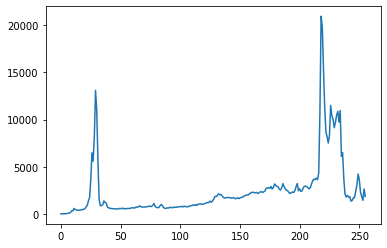

<function destroyAllWindows>

In [1]:
# 히스토그램 분석
# 영상의 픽셀 값 분포를 그래프의 형태로 표현한 것
# 히스토그램 구하기
# cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None) -> hist
# images : 입력 영상 리스트
# channels: 히스토그램을 구할 채널을 나타내는 리스트 #[0,1,2] = 3차원 모두 구할 때
# mask: 마스크 영상. 입력 영상 전체에서 히스토그램을 구하려면 None 지정
# histSize: 히스토그램 각 차원의 크기(빈(bin)의 개수)를 나타내는 리스트
# ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
# hist: 계산된 히스토그램(numpy.ndarray)
# accumulate: 기존의 hist 히스토그램에 누적하려면 True, 새로 만드려면 False

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 그레이스케일 영상의 히스토그램
cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/469/2020/12/17/0000563766_001_20201217135726109.jpg?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src1 = cv2.cvtColor(src1, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([src1],[0], None, [256], [0,256])

cv2.imshow('src', src1)
cv2.waitKey(0)

plt.plot(hist)
plt.show()

cv2.destroyAllWindows

In [21]:
# 영상의 명암비 조절
# dst(x,y) = saturate(src(x,y) + (src(x,y)-128) * alpha)
# 위 수식을 변형, (1+alpha) * src(x,y)-128 * alpha

import sys
import numpy as np
import cv2

def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    return imgHist

# 그레이스케일 영상의 히스토그램
cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/008/2020/12/24/0004519419_001_20201224173819722.png?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src1 = cv2.cvtColor(src1, cv2.COLOR_RGB2GRAY)
    

alpha = 1.0
# dst = np.clip((1 + alpha) * src1 - 128 * alpha, 0, 255).astype(np.uint8)  #uint8로 바꾸는 이유는 float 결과가 나오기 때문

# 히스토그램 스트래칭
# cv2.normalize(src, dst, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: (노름 정규화인 경우) 목표 노름 값,
#        (원소 값 범위 정규화인 경우) 최솟값  -> 0
# beta:  (원소 값 범위 정규화인 경우) 최댓값  -> 255
# norm_type: 정규화 타입. NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX.
# dtype: 결과 영상의 타입
# mask: 마스크 영상

#dst1 = cv2.normalize(src1, None, 0, 255, cv2.NORM_MINMAX)
gmin = np.min(src1)
gmax = np.max(src1)
dst1 = np.clip((src1 - gmin) * 255. / (gmax - gmin), 0, 255).astype(np.uint8)  # . 찍는 이유는 uint8 형태를 맞춰주기위해


hist = cv2.calcHist([src1], [0], None, [256], [0,256])
histImg = getGrayHistImage(hist)

hist2 = cv2.calcHist([dst1], [0], None, [256], [0,256])
histImg2 = getGrayHistImage(hist2)

cv2.imshow('src1',src1)
cv2.imshow('dst1', dst1)
cv2.imshow('histImg', histImg)
cv2.imshow('histImg2', histImg2)


cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 히스토그램 평활화 = (균등화, 균일화, 평탄화)
# 히스토그램이 그레이스케일 전체 구간에서 균일한 분포로 나타나도록 변경하는 명암비 향상 기법
# cv2.equalizeHist(src, dst=None) -> dst
# src: 입력영상

def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    return imgHist


import sys
import numpy as np
import cv2

alpha = 1.0

cap = cv2.VideoCapture("https://spacenews.com/wp-content/uploads/2020/07/PHOTO-4-MARS-HABITATS-879x485.jpg")
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src1 = cv2.cvtColor(src1, cv2.COLOR_RGB2GRAY)

dst1 = cv2.normalize(src1, None, 0, 255, cv2.NORM_MINMAX)

# 히스토그램 평활화
dst2 = cv2.equalizeHist(dst1) 

# 히스토그램 스트레칭
# alpha = 1.0
dst3 = np.clip((1 + alpha) * dst1 - 128 * alpha, 0, 255).astype(np.uint8)
# dst3 = cv2.calcHist([src1], [0], None, [256], [0, 256])

dst_hist1 = getGrayHistImage(dst1)
dst_hist2 = getGrayHistImage(dst2)
dst_hist3 = getGrayHistImage(dst3)

cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst_hist1',dst_hist1)
cv2.imshow('dst_hist2',dst_hist2)
cv2.imshow('dst_hist3',dst_hist3)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# 컬러 영상의 히스토그램 평활화

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://spacenews.com/wp-content/uploads/2020/07/PHOTO-4-MARS-HABITATS-879x485.jpg") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src_ycrcb = cv2.cvtColor(src1, cv2.COLOR_BGR2YCrCb)

src = cv2.split(src_ycrcb)
src[0] = cv2.equalizeHist(src[0])
dst_ycrcb = cv2.merge(src)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src1',src1)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# 특정 색상 영역 추출하기
# cv2.inRange(src, lowerb, upperb, dst=None) -> dst(마스크 값))
# src: 입력 행렬
# lowerb: 하한 값 행렬 또는 스칼라
# upperb: 상한 값 행렬 또는 스칼라
# dst: 입력 영상과 같은 크기의 마스크 영상(numpy.uint8)
# https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART001808058

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://www.energytimes.kr/news/photo/201905/53211_21996_5646.jpg")
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src_ycrcb = cv2.cvtColor(src1, cv2.COLOR_BGR2YCrCb)

dst1 = cv2.inRange(src1, (0,0,0), (40,40,40))
dst2 = cv2.inRange(src_ycrcb, (200, 150, 0), (220, 220, 150))

cv2.imshow('src', src1)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# 트랙바를 이용한 특정 색상 영역 추출

import sys
import numpy as np
import cv2

def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst') #'dst' 윈도우에 있는 H_min을 받아오는 함수
    hmax = cv2.getTrackbarPos('H_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)


cap = cv2.VideoCapture("https://www.energytimes.kr/news/photo/201905/53211_21996_5646.jpg")
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)

cv2.imshow('src', src1)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)

on_trackbar(0)

cv2.waitKey()
cv2.destroyAllWindows()


In [26]:
# 히스토그램 역투영
# 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
# -> 임의의 색상 영역을 검출할 때 효과적
# cv2.calcBackProject(images, channels, hist, ranges, scale, dst=None) -> dst 
# images: 입력 영상 리스트
# channels: 역투영 계산에 사용할  채널 번호 리스트
# hist: 입력 히스토그램(numpy.ndarray)
# ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
# scale: 출력 역투영 행렬에 추가적으로 곱할 값
# dst: 출력 역투영 영상. 입력 영상과 동일 크기. cv2.CV_8U

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://lh3.googleusercontent.com/proxy/qP8Ir1kOKdvnSaQZYYUqYy024bBKbYLCAe6bUwifzXyTZBaKga7hEAUL9pLv3XDlB3xnUAww5nraCz-Q_MdQ7L-MmKJsFC-6tOYiDImwnXO2HTZt") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    src1 = cv2.resize(src1, (800,600))
    src_ycrcb = cv2.cvtColor(src1, cv2.COLOR_BGR2YCrCb)

x, y, w, h = cv2.selectROI(src1)

crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(hist, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src1, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://www.energytimes.kr/news/photo/201905/53211_21996_5646.jpg") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    ref_ycrcb = cv2.cvtColor(src1, cv2.COLOR_BGR2YCrCb)

mask = dst2

channels = [1, 2]
ranges = [0, 256, 0, 256]
hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상에 히스토그램 역투영 적용
cap2 = cv2.VideoCapture("https://lh3.googleusercontent.com/proxy/0x1u0Wxti0G78oozOblSwq8E70yVbG-DXwgPIyXiz4gidviDUoxZCqiZ87gqqmOpUZjqKdzda4RF3ITtfzDCEQR0DrYVGzl3icvf3tdg1Fe69ut8")
if( cap2.isOpened() ) :
    ret,img = cap2.read()
    src = img.copy()
    src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
# 크로마 키 합성
# 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술
# 녹색 스크린 영역 추출하기
# 녹색 영역에 다른 배경 영상을 합성하여 저장하기
# 스페이스바를 이용하여 크로마 키 합성 동작 제어하기
# cv2.inRange() 함수 사용 50<= H <= 80, 150<= S <= 255, 0 <= V <= 255)범위의 영역을 검출

import sys
import numpy as numpy
import cv2

# 녹색 배경 동영상
import pafy
 
url = "https://www.youtube.com/watch?v=k-Zyay54M3Q&list=PLv48ZAndHWABl3t_VgFI-ANnI2zfC7uSD"

video = pafy.new(url)
best = video.getbest(preftype="mp4")
print("best resolution : {}".format(best.resolution))
cap = cv2.VideoCapture(best.url)

cap2 = cv2.VideoCapture('back.mp4')

# 두 동영상의 크기, FPS는 같다고 가정
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1 = round(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))

fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 출력 동영상 객체 생성
# 인코딩 방식을 설정
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))


# 합성 여부 플래그
do_composit = True

# 전체 동영상 재생
while True:
    retval, frame = cap.read()
    if not(retval):
        break

    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # 사진의 경우
        # frame2 = cv2.imread('snow.jpg')

        # 동영상 사이즈 첫 동영상에 맞춤
        frame2 = cv2.resize(frame2, (w,h))

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (80, 255, 255))
        cv2.copyTo(frame2, mask, frame)

    out.write(frame)
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(delay)
    
    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break
        
if cap.isOpened():
    cap.release()
    cap2.release()

cv2.destroyAllWindows()

best resolution : 640x318


In [4]:
##################################################### 필터링 ###################################################################

In [ ]:
# 필터링
# 주파수 공간에서의 필터링
# 공간적 필터링 - 영상의 픽셀 값을 직접 이용하는 필터링 방법
# cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst
# src: 입력 영상
# ddepth: 출력 영상 데이터 타입. (cv2.CV_8U,,,,) - -1 을 지정하면 src와 같은 타입의 dst 영상을 생성
# kernel: 필터 마스크 행렬, 실수형
# anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용
# delta: 추가적으로 더할 값
# borderType: 가장자리 픽셀 확장 방식
# dst: 출력 영상


In [11]:
# 필터링 - 블러링(1) 평균값 필터 - mean 필터
# 영상의 특정 좌표 값을 주변 픽셀 값들의 산술 평균으로 결정
# 픽셀들 간의 그레이스케일 값 변화가 줄어들어 날카로운 에지가 무뎌지고, 영상에 있는 잡음의 영향이 사라지는 효과
# -> 마스크 크기가 커질 수록 결과 영상이 더 부드러워지지만 연산량 증가
# cv2.blur(src, ksize, dst=None, anchor=None, borderType=None) -> dst
# src: 입력 영상
# ksize: 평균값 필터 크기. (width, height)형태의 튜플
# dst: 결과 영상

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/008/2020/12/24/0004519419_001_20201224173819722.png?type=w647") # (960,640,3)
if( cap.isOpened() ) :
    ret,img = cap.read()
    src1 = img.copy()
    # src_ycrcb = cv2.cvtColor(src1, cv2.COLOR_BGR2YCrCb)

# kernel = np.array([[1/9, 1/9, 1/9],
#                     [1/9, 1/9, 1/9],
#                     [1/9, 1/9, 1/9]], dtype=np.float32)
kernel = np.ones((3,3), dtype=np.float64) / 9.
# dst = cv2.filter2D(src1, -1, kernel)

dst = cv2.blur(src1, (3,3))

cv2.imshow('src', src1)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 필터링 - 블러링(2) 가우시안 필터 - weighted mean
# Symmetric (대칭) - mean = median = mode 
# cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) -> dst
# src: 입력영상
# dst: 출력영상, src와 같은 크기, 타입
# ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨. -> ksize 값을 안주는게 좋음(0,0)
# sigmaX: x 방향 sigma
# sigmaY: y 방향 sigma
# borderType: 가장자리 픽셀 확장 방식

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg") # (960,640,3)
ret,img = cap.read()
src = img.copy()

dst = cv2.GaussianBlur(src, (0, 0) , 1)
dst2 = cv2.blur(src, (7,7))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# 샤프닝: 언샤프 마스크 필터
# 언샤프 마스크 필터링 - 날카롭지 않은 영상, 즉 부드러워진 영상을 이용하여 날카로운 영상을 생성


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

blr = cv2.GaussianBlur(src, (0, 0) , 2)
# dst = cv2.subtract(src, blr)
# dst = cv2.addWeighted(src, 1, blr, -1, 128)
# dst = cv2.addWeighted(src, 2, blr, -1, 0)
dst = np.clip(2.0 * src - blr, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('blr', blr)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [24]:
# 잡음제거(1) - 미디언 필터
# f(x,y) - s(x,y) + n(x,y)
# 미디언 필터 - 주변 픽셀들의 값들을 정렬하여 그 중앙값으로 픽셀 값을 대체
# cv2.medianBlur(src, ksize, dst=None) -> dst
# src: 입력영상
# ksize: 커널 크기. 1 보다 큰 홀수를 지정
# dst: 출력영상, src와 같은 크기, 타입

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

dst = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
# 잡음제거(2) - 양방향 필터
# 가우시안 잡음 제거에는 가우시안 필터가 효과적
# 양방향 필터(Bilateral filter) - 에지 보전 잡음 제거 필터의 하나, 평균 값 필터 또는 가우시안 필터는 에지 부근에서도 픽셀 값을 평탄하게 만드는 단점이 있음.
# 양방향 필터는 에지가 아닌 부분에서만 blurring하여 디테일 손실이 적음.
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst=None, borderType=None) -> dst
# src: 입력영상, 8비트 또는 실수형, 1채널 또는 3채널.
# d: 필터링에 사용될 이웃 픽셀의 거리(지름) -> 음수(-1)을 입력하면 sigmaSpace 값에 의해 자동 결정됨.abs
# sigmaColor: 색 공간에서 필터의 표준 편차
# sigmaSpace: 좌표 공간에서 필터의 표준 편차
# dst: 출력영상, src와 같은 크기, 타입
# borderType: 가장자리 픽셀 처리 방식

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://www.boannews.com//media/upFiles2/2020/03/1020603646_2820.jpg")
ret,img = cap.read()
src = img.copy()

dst = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
# 실전 코딩 : 카툰 필터 카메라
# 카툰 필터 카메라-> 카메라 입력 영상에 실시간으로 재미있는 필터링을 적용하는 기능
# 구현할 기능, 1) 카툰필터 2) 스케치 필터 3) 스페이스바를 누를 때마다 모드 변경

import sys
import numpy as np
import cv2

def cartoon_filter(img):
    h, w = img.shape[:2]
    img = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img, -1, 20, 7)
    edge = 255 - cv2.Canny(img, 50, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)

    return dst

def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale = 255)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst

cam_mode = 0

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    if not ret:
        break

    if cam_mode == 1:
        frame = cartoon_filter(frame)

    elif cam_mode == 2:
        frame = pencil_sketch(frame)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0

cap.release()
cv2.destroyAllWindows()

In [5]:
##################################################### 기하학적 변환 ###################################################################

In [4]:
# 기하학적 변환
# 1) 영상의 이동 변환과 전단 변환
# cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst
# src: 입력 영상
# M: 2*3 어파인 변환 행렬. 실수형.
# dsize: 결과 영상 크기, (w,h)튜플. (0,0) 이면 src와 같은 크기로 설정
# dst: 출력 영상
# flags: 보간법. 기본값은 cv2.INTER_LINEAR.
# borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
# borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0 흰색으로 채우려면 255 입력


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

# aff = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32) # x 축 밀림
aff = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float32) # y 축 밀림

h, w = src.shape[:2]

# dst = cv2.warpAffine(src, aff, (0, 0))
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h)) # y 축 밀림에 x 축도 밀림

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()



In [32]:
# 기하학적 변환
# 2) 영상의 확대와 축소
# cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None) -> dst
# src: 입력 영상
# dsize: 결과 영상 크기. (w, h) 튜플. (0,0)이면 fx 와 fy값을 이용하여 결정
# fx, fy: x 와 y방향 스케일 비율(scale factor).(dsize값이 0일 때 유효)
# interpolation: 보간법 지정. 기본값은 cv2.INTER_LINEAR
# cv2.INTER_NEAREST 최근방 이웃 보간법 << 가장 빠르나 품질 안좋음
# cv2.INTER_LINEAR 양선형 보간법 << 효과 적당, 속도 빠름
# cv2.INTER_CUBIC 3차회선 보간법 << LINEAR 보다 성능 좋으나 조금 더 느림
# cv2.INTER_LANCZOS4 Lanczos 보간법 << CUBIC 보다 성능 좋으나 조금 더 느림
# cv2.INTER_AREA << 영상 축소시 효과적
# 영상 축소시 고려할 사항: 디테일 손실 -> 부드럽게 필터링한 후 축소 or 다단계 축소 / cv2.resize()함수에서 cv2.INTER_AREA 플래그 사용
# cv2.flip(src, flipCode, dst=None) -> dst
# src: 입력영상, flipCode: 대칭방향 지정(좌우:+1,상하:0,좌우*상하:-1), dst: 출력영상

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1200, 1200)) # interpolation=cv2.INTER_LINEAR    (2 * 2 이웃 픽셀 참조)
dst3 = cv2.resize(src, (1200, 1200), interpolation=cv2.INTER_CUBIC)    # (4 * 4 이웃 픽셀 참조)
dst4 = cv2.resize(src, (1200, 1200), interpolation=cv2.INTER_LANCZOS4) # (8 * 8 이웃 픽셀 참조)



cv2.imshow('src', src)
cv2.imshow('dst1', dst1[500:1100, 500:900])
cv2.imshow('dst2', dst2[500:1100, 500:900])
cv2.imshow('dst3', dst3[500:1100, 500:900])
cv2.imshow('dst4', dst4[500:1100, 500:900])
cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
# 기하학적 변환
# 3) 이미지 피라미드
# 하나의 영상에 대해 다양한 해상도의 영상 세트를 구성한 것
# 보통 가우시안 블러링 & 다운샘플링 형태로 축소하여 구성
# 다양한 크기를 만들어두면 객체 검출 성능을 높일 수 있음.
# cv2.pyrDown(src, dst=None, dstsize=None, borderType=None) -> dst
# src: 입력영상 , dst: 출력영상 , dstsize: 출력영상크기, 따로 지정하지 않으면 전체의 1/2 , borderType: 가장자리 픽셀 확장 방식(5x5크기의 가우시안 필터를 적용)
# cv2.pyrUp(src, dst=None, dstsize=None, borderType=None) -> dst 

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

rc = (100, 100, 250, 150) # rectangle tuple

# 원본 영상에 그리기

cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow('src', cpy)

# 피라미드 영상에 그리기
for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0,0,255), 2, shift = i)
    cv2.imshow('src', cpy)
    cv2.waitKey()


cv2.destroyAllWindows()

In [47]:
# 기하학적 변환
# 4) 영상의 회전
# 회전 변환 - 영상을 특정 각도만큼 회전시키는 변환
# cv2.getRotationMatrix2D(center, angle, scale) -> retval
# center: 회전 중심 좌표, (x,y) 튜플
# angle: (반시계 방향) 회전 각도(degree). 음수는 시계 방향.
# scale: 추가적인 확대 비율
# retval: 2 * 3 어파인 변환 행렬. 실수형.

import sys
import numpy as np
import cv2
import math

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

rad = 20 * math.pi / 180 #(20도에 해당하는 것을 radian단위로 바꾼 것)
aff = np.array([[math.cos(rad), math.sin(rad), 0], [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

# dst = cv2.warpAffine(src, aff, (0,0))

cp = (src.shape[1] / 2, src.shape[0] / 2) #src.shape[1] : 가로 / src.shape[0] : 세로
rot = cv2.getRotationMatrix2D(cp, 20, 0.7)
dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
# 기하학적 변환
# 5) 어파인 변환과 투시 변환 3*3 matrix
# cv2.getAffineTransform(src, dst) -> retval
# src: 3개의 원본 좌표점. numpy.ndarray. shape=(3,2) / dst: 3개의 결과 좌표점. src와 같음 / retval: 2*3 투시 변환 행렬
# 투시 변환 행렬 구하기
# cv2.getPerspectiveTransform(src, dst, solveMethod=None) -> retval
# src: 4개의 원본 좌표점. numpy.ndarray. shape=(4,2) / dst: 4개의 결과 좌표점. numpy.ndarray. shape=(4,2) / retval: 3*3 투시 변환 행렬
# cv2.warpPerspective(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst
# src: 입력영상
# M: 3*3 투시 변환 행렬. 실수형
# 나머지는 warpAffine 함수와 같음

import sys
import numpy as np
import cv2

def on_mouse(event, x,y, flags, click_count):
    global img, oldx, oldy, adr
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('LbunttonDown: {}, {}'.format(x,y))
        adr.append([x,y])
        cv2.circle(img, (x,y), 5, (0,0,255), -1)
        print(adr)

w, h = 720, 400
adr = []

while len(adr) <= 3:
    cap = cv2.VideoCapture("https://i.ytimg.com/vi/_SXY46a_djU/maxresdefault.jpg")
    ret,img = cap.read()
    src = img.copy()

    cv2.namedWindow('image')
    cv2.imshow('image', src)
    cv2.setMouseCallback('image', on_mouse)

    if cv2.waitKey() == 27 or len(adr) == 4:
        break

cv2.destroyAllWindows()




srcQuad = np.array([adr[0], adr[1], adr[2], adr[3]], np.float32)
dstQuad = np.array([[0,0], [w-1, 0], [w-1, h-1], [0,h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

LbunttonDown: 59, 605
[[59, 605]]
LbunttonDown: 206, 490
[[59, 605], [206, 490]]
LbunttonDown: 212, 513
[[59, 605], [206, 490], [212, 513]]
LbunttonDown: 63, 638
[[59, 605], [206, 490], [212, 513], [63, 638]]


In [17]:
# 기하학적 변환
# 6) 리매핑
# 영상의 특정 위치 픽셀을 다른 위치에 재배치하는 일반적인 프로세스
# dst(x,y) = src(mapX(x,y), mapY(x,y))
# cv2.remap(src, map1, map2, interpolation, dst=None, borderMode=None, borderValue=None) -> dst
# src: 입력 영상
# map1: 결과 영상의 (x,y)좌표가 참조할 입력 영상의 x좌표. 입력영상과 크기는 같고 타입은 np.float32인 numpy.ndarray
# map2: 결과 영상의 (x,y)좌표가 참조할 입력 영상의 y좌표.
# interpolation: 보간법
# dst: 출력영상
# borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.abs
# borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32) # map2 가 y좌표 인덱스, map1이 x좌표 인덱스 / np.indices는 행렬의 x좌표와 y좌표를 반환
map2 = map2 + 10 * np.sin(map1 / 32)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
# 기하학적 변환
# 7) 실전코딩: 문서 스캐너
# 구현 할 기능 1)마우스로 문서 모서리 선택 & 이동하기 2)키보드 Enter키 인식 3) 왜곡된 문서 영상을 직사각형 형태로 똑바로 펴기 (투시 변환)

import sys
import numpy as np
import cv2

def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt), 25, (192, 192, 255), -1, cv2.LINE_AA)
    
    cv2.line(cpy,tuple(corners[0]), tuple(corners[1]), c2, 2, cv2.LINE_AA)
    cv2.line(cpy,tuple(corners[1]), tuple(corners[2]), c2, 2, cv2.LINE_AA)
    cv2.line(cpy,tuple(corners[2]), tuple(corners[3]), c2, 2, cv2.LINE_AA)
    cv2.line(cpy,tuple(corners[3]), tuple(corners[0]), c2, 2, cv2.LINE_AA)

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)
    return disp

def on_mouse(event, x,y, flags, param):
    global srcQuad, dragSrc, ptOld, src
    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25: # 25는 원의 반지름 크기. 이를 ㅂ ㅓㅅ어나면 클릭 무시
                dragSrc[i] = True
                ptOld = (x, y)
                break
    
    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False
    
    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow('img', cpy)
                ptOld = (x, y)
                break


cap = cv2.VideoCapture("https://imgnews.pstatic.net/image/005/2020/12/26/611719110015362892_1_20201226121517083.jpg?type=w647")
ret,img = cap.read()
src = img.copy()

h , w = src.shape[:2]
dw = 500
# dh = round(dw * 297 / 210) # A4 용지 크기: 210*297
dh = 500

# 모서리 점들의 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh-1], [dw-1, dh-1], [dw-1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow('img', disp)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()
    if key == 13: #ENTER 키
        break
    elif key == 27:
        cv2.destroyWindow('img')
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags = cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [6]:
##################################################### 영상의 특징 추출 ###################################################################

In [3]:
# 1)영상의 미분과 소베 필터
# 중앙차분 활용
# cv2.Sobel(src, ddepth, dx, dy, dst=None, ksize=None, scale=None, delta=None, borderType=None) -> dst
# src: 입력영상
# ddepth: 출력영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용.
# dx: x방향 미분 차수.
# dy: y방향 미분 차수.
# dst: 출력 영상(행렬)
# ksize: 커널 크기, 기본값은 3
# scale: 연산 결과에 추가적으로 곱할 값. 기본값은 1.
# delta: 연산 결과에 추가적으로 더할 값. 기본값은 0.
# borderType: 가장자리 픽셀 확장 방식. 기본 값은 cv2.BORDER_DEFAULT
# cv2.Scharr


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()

# kernel = np.array([
#     [-1, 0, 1],
#     [-2, 0, 2],
#     [-1, 0, 1]], dtype=np.float32)

# dx = cv2.filter2D(src, -1, kernel, delta= 128)
# dy = cv2.filter2D(src, 0, kernel, delta= 128)

dx = cv2.Sobel(src, -1, 1, 0, delta=128)
dy = cv2.Sobel(src, -1, 0, 1, delta=128)

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# 2) 그래디언트와 에지 검출
# 영상의 그래디언트 : 함수 f(x,y)를 x축과 y축으로 각각 편미분하여 벡터 형태로 나타낸 것.
# -> x,y축 모두에 대해 미분한 것을 표현하겠다
# cv2.magnitude(x, y, magnitude=None) -> magnitude
# x: 2D 벡터의 x 좌표 행렬. 실수형.
# y: 2D 벡터의 y 좌표 행렬. x 와 같은 크기. 실수형
# magnitude: 2D 벡터의 크기 행렬. x 와 같은 크기, 같은 타입
# cv2.phase(x, y, angle=None, angleInDegrees)
# angle: 2D 벡터의 크기 행렬. x 와 같은 크기, 같은 타입
# angleInDegrees: True면 각도 단위, False이면 래디언 단위.


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)

edge = np.zeros(mag.shape[:2], np.uint8)
edge[mag > 120] = 255

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('edge', edge)

cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
# 3) 캐니 에지 검출
# 좋은 에지 검출기의 조건 1) 정확한 검출 , 2) 정확한 위치 , 3) 단일 에지
# cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None) -> edges
# images: 입력 영상
# threshold1: 하단 임계값
# threshold2: 상단 임계값   ->  threshold1:threshold2 = 1:2 또는 1:3
# edges: 에지 영상
# apertureSize: 소벨 연산을 위한 커널 크기. 기본값은 3
# L2gradient: True면 L2 norm 사용, False면 L1 norm 사용, 기본값은 False

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.pinimg.com/originals/db/87/e0/db87e0cd04ad0eb5c92ae6d8c1187346.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(src, 120, 200)

cv2.imshow('src', src)
cv2.imshow('edge', edge)

cv2.waitKey()
cv2.destroyAllWindows()


In [2]:
# 허프 변환: 직선 검출
# 2차원 영상 좌표에서의 직선의 방정식을 파라미터 공간으로 변환하여 직선을 찾는 알고리즘
# y = ax + b <-> b = -xa + y
# cv2.HoughLines(image, rho, theta, threshold, lines=None, srn=None, stn=None, min_theta=None, max_theta=None) -> lines
# image: 입력 에지 영상
# rho: 축적 배열에서 rho값의 간격. (1.0 -> 1픽셀 간격)
# theta: 축적 배열에서 theta값의 간격. (np.pi / 180 -> 1도 간격)
# threshold: 축적 배열에서 직선으로 판단할 임계값
# lines: 직선 파라미터(rho, theta) 정보를 담고 있는 numpy.ndarray. shape=(N, 1, 2), dtype=numpy.float32
# srn, stn: 멀티 스케일 허프 변환에서 rho 해상도, theta 해상도를 나누는 기본값은 0이고, 이 경우 일반 허프 변환 수행.
# min_theta, max_theta: 검출할 선분의 최소, 최대 theta 값

# cv2.HoughLinesP(image, rho, theta, threshold, lines=None, minLineLength=None, maxLineGap=None) -> lines   <<< 이 함수를 보다 선호
# lines: 선분의 시작과 끝 좌표 (x1, y1), (x2, y2)정보를 담고 있는 numpy.ndarray. shape=(N,1,4), dtype=numpy.int32
# minLineLength: 검출할 선분의 최소 길이
# maxLineGap: 직선으로 간주할 최대 에지 점 간격


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edge, 1.0, np.pi / 180, 120, minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)


cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()


In [2]:
# 허프 변환: 원 검출
# 원의 방정식: (x-a)₂ + (y-b)₂=c₂
# cv2.HoughCircles(image, method, dp, minDist, circles=None, param1 =None, param2=None, minRadius=None, maxRadius=None) -> circles
# image: 입력 영상 / method: OpenCV4.2 이하에서는 cv2.HOUGH_GRADIENT만 지정 가능
# dp: 입력 영상과 축적 배열의 크기 비율 1이면 동일크기. 2이면 축적 배열의 가로 세로 크기가 1/2
# minDist: 검출된 원 중심점들의 최소 거리
# circles: (cx, cy, r) 정보를 담은 np.ndarray.shape=(1,N,3),dtype=np.float32 
# param1: Canny 에지 검출기의 높은 임계값
# param2: 축적 배열에서 원 검출을 위한 임계값
# minRadius, maxRadius: 검출할 원의 최소, 최대 반지름

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://ww.namu.la/s/e0ea5acbbc23755f81a3228b7378ad01b4da9db55943d1f1e5af757983c5fb0c8a1a3c8c354c095b08fcd8b245ca5c3fba84954a66e380b25e9b1bb3306054f593afe132c220b8b97a6757819727ec5bc62bb9ab56612f702fd75cb08a1d533b")
ret,img = cap.read()
src = img.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = cv2.getTrackbarPos('threshold', 'img')

    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=120, param2=th, minRadius=rmin, maxRadius=rmax)

    dst = src.copy()
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = circles[0][i]
            cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', dst)


# 트랙바 생성
cv2.imshow('img', src)
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 1, 100, on_trackbar)
cv2.setTrackbarPos('minRadius', 'img', 20)
cv2.setTrackbarPos('maxRadius', 'img', 74)
cv2.setTrackbarPos('threshold', 'img', 54)
cv2.waitKey()

cv2.destroyAllWindows()


In [9]:
# 허프 변환 : 원 검출
# 실전 코딩: 동전 카운터
# 영상의 동전을 검출하여 금액이 얼마인지를 자동으로 계산하는 프로그램
# 100원짜리와 10원짜리만 있다고 가정
# 구현할 기능: 동전 검출하기 -> 허프 원 검출 / 동전 구분하기 -> 색상 정보 이용


import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
cap = cv2.VideoCapture("https://scontent-ssn1-1.xx.fbcdn.net/v/t1.0-9/22448537_907352416089820_391116970768833116_n.jpg?_nc_cat=108&ccb=2&_nc_sid=8bfeb9&_nc_ohc=TwWwUE-I0QEAX_Nk6uV&_nc_ht=scontent-ssn1-1.xx&oh=a0501143473d500c36f966bb9e6400a5&oe=60148969")
ret,img = cap.read()
src = img.copy()

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)

# 허프 변환 원 검출
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)

# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx - radius)
        y1 = int(cy - radius)
        x2 = int(cx + radius)
        y2 = int(cy + radius)
        radius = int(radius)
        
        crop = src[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.circle(mask, (cw//2, ch//2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]
        print(mean_of_hue)

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 52:
            won = 10

        sum_of_money += won

        cv2.putText(crop, str(won), (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst, str(sum_of_money) + ' won', (40, 80),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()





55.66693424309318
57.27922711599766
49.346030843578994
57.734986852391444
49.95509398083814
57.90024135156878
59.07898778614788
58.21622843366233


In [7]:
##################################################### 이진 영상 처리 ###################################################################

In [12]:
# 영상의 이진화
# 영상의 픽셀 값을 0 또는 255(1)로 만드는 연산
# cv2.threshold(src, thresh, maxval, type, dst=None) -> retval, dst
# src: 입력영상, 다채널, 8비트 또는 32비트 실수형 / thresh: 사용자 지정 임계값 / maxval: cv2.THRESH_BINARY 또는 cv2.THRESH_BINARY_INV 사용
# type: cv2.THRESH_ 로 시작하는 플래그
# retval: 사용된 임계값 / dst: 출력 영상. src와 동일 크기, 타입, 채널

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, dst1 = cv2.threshold(src, 210, 255, cv2.THRESH_BINARY)
_, dst2 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
# 2) 자동 이진화
# 임계값 자동 결정 방법
# Otsu 이진화 방법
# 배경과 객체 두 개로 구성되어 있다고 가정
# 임의의 임계값 T에 의해 나눠지는 두 픽셀 분포 그룹의 분산이 최소가 되는 T를 선택 / 일종의 최적화 알고리즘

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #otsu 방법을 쓰고 싶으면 thres에 0입력
# th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) # 반전을 시키고 싶으면 | 연산자 사용
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)
print("otsu's sthreshold:" , th)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

otsu's sthreshold: 139.0


In [6]:
# 3) 지역 이진화
# 균일하지 않은 조명의 영향을 해결하는 방법
# 픽셀 주변에 작은 윈도우를 설정하여 지역 이진화 수행.
# 


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 전역 이진화
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)


cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C, dst=None) -> dst
# src: 입력 영상, 그레이스케일 영상
# maxValue: 임계값 함수 최댓값. 보통 255
# adaptiveMethod: 블록 평균 계산 방법 지정. cv2ADAPTIVE_THRESH_MEAN_C는 산술평균, cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 가우시안 가중치 평균 (블러링 방법 어떻게 할 것인가)
# thresholdType: cv2.THRESH_BINARY 또는 cv2.THRESH_BINARY_INV 지정
# blockSize: 블록 크기. 3 이상의 홀수
# C: 블록 내 평균값 또는 블록 내 가중 평균값에서 뺄 값.

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, bsize, 5)
    cv2.imshow('dst', dst)

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)


cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 모폴로지(1), 침식과 팽창
# 영상을 형태학적인 측면에서 다루는 기법
# cv2.erode(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None) -> dst
# src: 입력영상
# kernel: 구조요소, getStructuringElement() 함수에 의해 생성 가능. 만약 None을 지정하면 3*3 사각형 구성 요소를 사용
# dst: 출력 영상, src와 동일한 크기와 타입
# anchor: 고정점, 기본값은 (-1, -1)
# iterations: 반복 횟수, 기본값은 1
# borderType: 가장자리 픽셀 확장 방식, 기본값은 cv2.BORDER_CONSTANT
# borderValue: cv2.BORDER_CONSTANT인 경우, 확장된 가장자리 픽셀을 채울 값
# cv2.dilate도 사용법이 erode와 내부적으로 같음

# cv2.getStructuringElement(shape, ksize, anchor=None) -> retval
# shape: 구조 요소 모양을 나타내는 플래그
# ksize: 구조 요소 크기, (width, height) 튜플
# anchor: 중앙점은 (-1, -1)
# retval: 0과 1로 구성된 cv2.CV_8UC1 타입 행렬. numpy.ndarray. (1의 위치가 구조 요소 모양을 결정)

import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://i.ytimg.com/vi/_SXY46a_djU/maxresdefault.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3)) # 3행 5열
dst1 = cv2.erode(src, se)

se = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
dst2 = cv2.dilate(src, None)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 모폴로지(2), 열기와 닫기
# 열기 = 침식 -> 팽창 / 닫기 = 팽창 -> 침식
# 열기, 작은 돌기, 작은 객체가 사라지고, 얇은 연결선이 끊어짐.
# 닫기, 작은 홈, 작은 홀이 사라지고, 얇은 연결선이 두꺼워짐.

# cv2.morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None) -> dst
# src: 입력영상 / op: 모폴로지 연산 플래그 / kernel: 커널 / dst: 출력 영상


import sys
import numpy as np
import cv2

cap = cv2.VideoCapture("https://postfiles.pstatic.net/MjAyMDEyMjdfMjA0/MDAxNjA4OTk4Mjg3Nzgx.jbWD_0BGkNMR4foY4z3r7LuCy3IhoOCdtlo8xoYjX74g.qXuy7-LHXMrqB0Ynu8ff1vuHN85XnbZmrB1eUgoo7D0g.JPEG.ckdmswl1102/IMG_5088.jpg?type=w966")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 지역 이진화
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:', cnt1)

# dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
dst1 = cv2.erode(dst1, None)
dst2 = cv2.dilate(dst2, None)

cnt2, _ = cv2.connectedComponents(dst2) # 몇개의 흰색 덩어리들이 있는지
print('cnt2:', cnt2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

cnt1: 225
cnt2: 2


In [12]:
# 이진 영상 처리 / 레이블링
# 객체 단위 분석 - 객체를 분할하여 특징을 분석
# 레이블링 - 서로 연결되어 있는 객체 픽셀에 고유한 번호를 지정 (레이블 맵)

# cv2.connectedComponents(image, labels=None, connectivity=None, ltype=None) -> retval, labels
# image: 8비트 1채널 영상
# labels: 레이블 맵 행렬, 입력 영상과 같은 크기. numpy.ndarray
# connectivity: 4또는 8, 기본 값은 8
# ltype: labels 타입, cv2.CV_32S 또는 cs2.CV_16S. 기본 값은 cv2.CV_32S
# retval: 객체 개수, N을 반환하면 [0, N-1]의 레이블이 존재하며, 0은 배경을 의미. (실제 흰색 객체 개수는 N-1개)

# cv2.connectedComponentsWithStats(image, labels=None, stats=None, centroids=None, connectivity=None, ltype=None) -> retval, labels, stats, centroids
# labels: 레이블 맵 행렬, 입력 영상과 같은 크기. numpy.ndarray
# stats: 각 객체의 바운딩 박스, 픽셀 개수 정보를 담은 행렬. numpy.ndarray. shape=(N,5), dtype=numpy.int32
# centroids: 각 객체의 무게 중심 위치 정보를 담은 행렬 numpy.ndarray. shape=(N,2), dtype=numpy.float64
# ltype: labels 행렬 타입. cv2.CV_32S 또는 cv2.CV_16S, 기본 값은 cv2.cv_16S

import sys
import numpy as np
import cv2


cap = cv2.VideoCapture("https://img.asiatoday.co.kr/file/2017y/06m/29d/20170628010014393_1503379184_1.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU) # 이진화


cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin) # 레이블링

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
    (x, y, w, h, area) = stats[i]

    if area < 20:
        continue
    
    cv2.rectangle(dst, (x,y,w,h), (0,0,255), 2)
    # cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
# 외곽선 검출
# cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None) -> contours, hierarchy
# image: 입력영상, non-zero 픽셀을 객체로 간주함
# mode: 외곽선 검출 모드. cv2.RETR_로 시작하는 상수
# method: 외곽선 근사화 방법. cv2.CHAIN_APPROX_로 시작하는 상수
# Contours: 검출된 외곽선 좌표, numpy.ndarray로 구성된 리스트 len(contours) = 전체 외곽선 개수(N)
# hierarchy: 외곽선 계층 정보, numpy.ndarray. shape=(1,N,4) dtype=numpy.int32 // hierarchy[0, i, 0] ~ hierarchy[0, i, 3]이 순서대로 next, prev, child, parent 외곽선 인덱스를 가리킴. 해당 외곽선이 없으면 -1
# offset: 좌표 값 이동 옵셋. 기본값은 (0,0)

# cv2.drawContours(image, contours, contourIdx, color, thickness=None, lineType=None, hierarchy=None, maxLevel=None, offset=None) -> image
# image: 입출력 영상
# contours: (cv2.findContours() 함수로 구한) 외곽선 좌표 정보
# contourIdx: 외곽선 인덱스, 음수(-1)을 지정하면 모든 외곽선을 그린다
# color: 외곽선 색상
# thickness: 외곽선 두께, thickness < 0 이면 내부를 채운다.
# lineType: LINE_4, LINE_8, LINE_AA 중 하나 지정
# hierarchy: 외곽선 계층 정보(from cv2.findContours())
# maxLevel: 그리기를 수행할 최대 외곽선 레벨, maxLevel = 0 이면 contour에서 지정된 외곽선만 그린다.

import sys
import random
import numpy as np
import cv2


cap = cv2.VideoCapture("https://img.asiatoday.co.kr/file/2017y/06m/29d/20170628010014393_1503379184_1.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

if src is None:
    print('Image load failed!')
    sys.exit()

contours, hier = cv2.findContours(src, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

idx = 0
while idx >= 0:
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, idx, c, 2, cv2.LINE_8, hier)
    idx = hier[0, idx, 0]  #hier(1,N,4)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()




In [9]:
import sys
import random
import numpy as np
import cv2


cap = cv2.VideoCapture("https://img.asiatoday.co.kr/file/2017y/06m/29d/20170628010014393_1503379184_1.jpg")
ret,img = cap.read()
src = img.copy()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

if src is None:
    print('Image load failed!')
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

h, w = src.shape[:2]
dst = np.zeros((h, w, 3), np.uint8)

for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, i, c, 1, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [4]:
# 다양한 외곽선 함수
# cv2.arcLength(curve, closed) -> retval
# curve: 외곽선 좌표. numpy.ndarray. shape=(k,1,2)
# retval: 외곽선 길이
# cv2.contourArea(contour, oriented=None) -> retval
# contour: 외곽선 좌표
# oriented: True면 외곽선 진행 방향에 따라 부호 있는 면적을 반환
# cv2.boundingRect(array) -> retval
# array: 외곽선 좌표
# retval: 사각형 정보(x,y,w,h) 튜플
# cv2.minEnclosingCircle(points) -> center, radius

# 외곽선 근사화
# cv2.approxPolyDP(curve, epsilon, closed, approxCurve=None) -> approxCurve
# curve: 입력 곡선 좌표, numpy.ndarray. shape=(K,1,2)
# epsilon: 근사화 정밀도 조(절, 입력 곡선과 근사화 곡선 간의 최대 거리 (외곽선 전체 길이 *0.02)
# closed: True면 폐곡선으로 인식
# approxCurve: 근사화된 곡선 좌표 numpy.ndarray. shaep=(K',1,2)
# cv2.isContourConvex(contour) -> retval
# contour: 입력 곡선 좌표.
# retval: 컨벡스면 True, 아니면 False

import cv2
import math

def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


def main():
    cap = cv2.VideoCapture("https://cdn1.byjus.com/wp-content/uploads/2019/09/types-of-regular-polygon.png")
    ret,img = cap.read()
 
    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for pts in contours:
        if cv2.contourArea(pts) < 400:  #  너무 작으면 무시
            continue

        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

        vtc = len(approx)

        if vtc == 3:
            setLabel(img, pts, 'TRI')
        elif vtc == 4:
            setLabel(img, pts, 'RECT')
        else:
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)

            if ratio > 0.85:
                setLabel(img, pts, 'CIR')

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


Image load failed!


In [9]:
# 실전 코딩: 명함 인식 프로그램
# 영상에서 명함을 검출하고, 명함 안의 텍스트를 인식하는 프로그램.
# 가정: 명함은 흰색이고, 충분히 크게 촬영되었고, 각진 사각형 모양이다.

"""
Tesseract-ocr 설치하기

1. tesseract-ocr-w64-setup-v5.0.0-alpha.20200328 파일 다운로드 
   (https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20200328.exe)
2. 설치 시 "Additional script data" 항목에서 "Hangul Script", "Hangul vertical script" 항목 체크,
   "Additional language data" 항목에서 "Korean" 항목 체크.
4. 설치 후 시스템 환경변수 PATH에 Tesseract 설치 폴더 추가
   (e.g.) c:\Program Files\Tesseract-OCR
4. 설치 후 시스템 환경변수에 TESSDATA_PREFIX를 추가하고, 변수 값을 <Tesseract-DIR>\tessdata 로 설정
5. <Tesseract-DIR>\tessdata\script\ 폴더에 있는 Hangul.traineddata, Hangul_vert.traineddata 파일을
   <Tesseract-DIR>\tessdata\ 폴더로 복사
6. 명령 프롬프트 창에서 pip install pytesseract 명령 입력
"""

import sys
import random
import numpy as np
import cv2
import pytesseract


def reorderPts(pts):
    idx = np.lexsort((pts[:, 1], pts[:, 0]))  # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]  # x좌표로 정렬

    if pts[0, 1] > pts[1, 1]:
        pts[[0, 1]] = pts[[1, 0]]

    if pts[2, 1] < pts[3, 1]:
        pts[[2, 3]] = pts[[3, 2]]

    return pts

# 영상 불러오기
cap = cv2.VideoCapture("https://lh3.googleusercontent.com/proxy/9zRP7skVeLsUSziPD1UkJ8v342qYhPj0KczAuFn_EXo3wEoHG06Cp1dCIAxbSwPkoCV3n_YBHu9UadEKKe2oioc83aDHjhgV6o1Fhu4dgN71NTrM9Jd9h0NaNyU-806fqEHNxgfm-h-BNJ1V75NmXH8_65Rphr0WUMhzImUaqmlR")
ret,img = cap.read()

if img is None:
    print('Image load failed!')

src = img.copy()

# 출력 영상 설정
dw, dh = 720, 400
srcQuad = np.array([[0, 0], [0, 0], [0, 0], [0, 0]], np.float32)
dstQuad = np.array([[0, 0], [0, dh], [dw, dh], [dw, 0]], np.float32)
dst = np.zeros((dh, dw), np.uint8)

# 입력 영상 전처리
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cpy = src.copy()
for pts in contours:
    # 너무 작은 객체는 무시
    if cv2.contourArea(pts) < 1000:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 컨벡스가 아니고, 사각형이 아니면 무시
    if not cv2.isContourConvex(approx) or len(approx) != 4:
        continue

    cv2.polylines(cpy, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)
    srcQuad = reorderPts(approx.reshape(4, 2).astype(np.float32))

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh))

dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(dst_gray, lang='Hangul+eng'))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [8]:
##################################################### 영상 분할과 객체 검출 ###################################################################

In [14]:
# 1) 그랩컷
# 그래프 컷 기반 영역 분할 알고리즘, 영상의 픽셀을 그래프 정점으로 간주하고, 픽셀들을 두개의 그룹으로 나누는 최적의 컷을 찾는 방식

# cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode=None) -> mask, bgdModel, fgdModel
# img: 입력영상 8비트 3채널
# mask: 입출력 마스크, cv2.GC_BGD(0), cv2.GC_FGD(1), cv2.GC_PR_BGD(2), cv2.GC_PR_FGD(3) 네 개의 값으로 구성됨. cv2.GC_INIT_WITH_RECT 모드로 초기화.
# rect: ROI영역, cv2.GC_INIT_WITH_RECT 모드에서만 사용됨
# bgdModel: 임시 배경 모델 행렬, 같은 영상 처리 시에는 변경 금지
# fgdModel: 임시 전경 모델 행렬, 같은 영상 처리 시에는 변경 금지
# iterCount: 결과 생성을 위한 반복 횟수
# mode: cv2.GC_로 시작하는 모드 상수, 보통 cv2.GC_INIT_WITH_RECT 모드로 초기화하고, cv2.GC_INIT_WITH_MASK 모드로 업데이트함

import sys
import numpy as np
import cv2


# 입력 영상 불러오기
cap = cv2.VideoCapture("https://s1.pearlcdn.com/KR/Upload/BANNER/MAIN/bannerMobileImage_20201221205606.jpg")
ret,img = cap.read()

src = img.copy()

if src is None:
    print('Image load failed!')
    sys.exit()

# 사각형 지정을 통한 초기 분할
rc = cv2.selectROI(src)
mask = np.zeros(src.shape[:2], np.uint8)

cv2.grabCut(src, mask, rc, None, None, 5, cv2.GC_INIT_WITH_RECT)

# 0: cv2.GC_BGD, 2: cv2.GC_PR_BGD
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask2[:, :, np.newaxis]

# 초기 분할 결과 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
# 그랩컷, 마우스 동작 버전

import sys
import numpy as np
import cv2


# 입력 영상 불러오기
cap = cv2.VideoCapture("https://movie-phinf.pstatic.net/20201214_12/1607927840278FNIDD_JPEG/movie_image.jpg?type=m665_443_2")
ret,img = cap.read()

src = img.copy()
if src is None:
    print('Image load failed!')
    sys.exit()
src = cv2.resize(src, (0, 0), fx=1, fy=1, interpolation=cv2.INTER_NEAREST)

# 사각형 지정을 통한 초기 분할
mask = np.zeros(src.shape[:2], np.uint8)  # 마스크
bgdModel = np.zeros((1, 65), np.float64)  # 배경 모델
fgdModel = np.zeros((1, 65), np.float64)  # 전경 모델

rc = cv2.selectROI(src)

cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

# 0: cv2.GC_BGD, 2: cv2.GC_PR_BGD
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask2[:, :, np.newaxis]

# 초기 분할 결과 출력
cv2.imshow('dst', dst)

# 마우스 이벤트 처리 함수 등록
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(dst, (x, y), 3, (255, 0, 0), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
        cv2.imshow('dst', dst)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(dst, (x, y), 3, (0, 0, 255), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
        cv2.imshow('dst', dst)
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(dst, (x, y), 3, (255, 0, 0), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
            cv2.imshow('dst', dst)
        elif flags & cv2.EVENT_FLAG_RBUTTON:
            cv2.circle(dst, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
            cv2.imshow('dst', dst)


cv2.setMouseCallback('dst', on_mouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER
        # 사용자가 지정한 전경/배경 정보를 활용하여 영상 분할
        cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        dst = src * mask2[:, :, np.newaxis]
        cv2.imshow('dst', dst)
    elif key == 27:
        break

cv2.destroyAllWindows()


In [15]:
# 모멘트 기반 객체 검출
# 모멘트란 영상의 형태를 표현하는 일련의 실수값
# cv2.matchShapes(contour1, contour2, method, parameter) -> retval
# contour1: 첫 번째 외곽선 또는 그레이스케일 영상
# contour2: 두 번째 외곽선 또는 그레이스케일 영상
# method: 비교 방법 지정, cv2.CONTOURS_MATCH_I1~3 중 하나 사용
# parameter: 사용되지 않음. 0 지정
# retval: 두 외곽선 또는 그레이스케일 영상 사이의 거리(distance)

import sys
import numpy as np
import cv2


# 영상 불러오기
cap = cv2.VideoCapture("https://lh3.googleusercontent.com/proxy/1wt5mF-t4IK_FcuS-i5BUts1Fk3foVrK7Ww3EJ1u-_Sq9wdJTIm5Ffdf_dYLceXPtewJq0vjSEmCxXX4vEokpoj7DPNOa5N3jhc4h-KAm0S0QqGWwaBT4uIRsJifSVky9Suha5GiPaMb1UcemKrZ-3lbwOg5-ne8Ky6l")
ret,img = cap.read()

obj = img.copy()
if obj is None:
    print('Image load failed!')
    sys.exit()
obj = cv2.cvtColor(obj, cv2.COLOR_BGR2GRAY)

# 입력 영상 불러오기
cap = cv2.VideoCapture("https://i.ytimg.com/vi/_SXY46a_djU/maxresdefault.jpg")
ret,img = cap.read()

src = img.copy()
if src is None:
    print('Image load failed!')
    sys.exit()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


# 객체 영상 외곽선 검출
_, obj_bin = cv2.threshold(obj, 128, 255, cv2.THRESH_BINARY_INV)
obj_contours, _ = cv2.findContours(obj_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
obj_pts = obj_contours[0]

# 입력 영상 분석
_, src_bin = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 결과 영상
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

# 입력 영상의 모든 객체 영역에 대해서
for pts in contours:
    if cv2.contourArea(pts) < 1000:
        continue

    rc = cv2.boundingRect(pts)
    cv2.rectangle(dst, rc, (255, 0, 0), 1)

    # 모양 비교
    dist = cv2.matchShapes(obj_pts, pts, cv2.CONTOURS_MATCH_I3, 0)

    cv2.putText(dst, str(round(dist, 4)), (rc[0], rc[1] - 3),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1, cv2.LINE_AA)

    if dist < 0.1:
        cv2.rectangle(dst, rc, (0, 0, 255), 2)

cv2.imshow('obj', obj)
cv2.imshow('dst', dst)
cv2.waitKey(0)


AttributeError: 'NoneType' object has no attribute 'copy'

In [1]:
# 템플릿 매칭(1): 이해하기
# 입력 영상에서 (작은 크기의) 템플릿 영상과 일치하는 부분을 찾는 기법
# 템플릿: 찾을 대상이 되는 작은 영상. 패치.
# cv2.matchTemplate(image, templ, method, result=None, mask=None) -> result
# image: 입력 영상, 8비트 또는 32비트
# templ: 템플릿 영상, image 보다 같거나 작은크기, 같은 타입
# method: 비교방법, cv2.TM_으로 시작하는 플래그 지정
# result: 비교 결과 행렬, numpy.ndarray. dtype=numpy.float32 image의 크기가 W*H이고, templ의 크기가 w*h면 result 크기는 (W - 1) * (H-h+1)
# cv2.TM_SQDIFF_NORMED 같으면 0, 다르면 값이 커짐

import sys
import numpy as np
import cv2


# 입력 영상 & 템플릿 영상 불러오기
cap = cv2.VideoCapture("https://image.yes24.com/momo/TopCate2378/MidCate10/237792675.jpg")
ret,img = cap.read()

src = img.copy()
if src is None:
    print('Image load failed!')
    sys.exit()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

cap = cv2.VideoCapture("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDeEz2Tp6H4z_EmnV1TpA4lVXp3iea8G4pxg&usqp=CAU")
ret,img = cap.read()

templ = img.copy()
if src is None:
    print('Image load failed!')
    sys.exit()
templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)


if src is None or templ is None:
    print('Image load failed!')
    sys.exit()

# 입력 영상 밝기 50증가, 가우시안 잡음(sigma=10) 추가
noise = np.zeros(src.shape, np.int32)
# cv2.randn(noise, 50, 10)
src = cv2.add(src, noise, dtype=cv2.CV_8UC3)

# 템플릿 매칭 & 결과 분석
res = cv2.matchTemplate(src, templ, cv2.TM_CCOEFF_NORMED)
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxloc = cv2.minMaxLoc(res)
print('maxv:', maxv)
print('maxloc:', maxloc)

# 매칭 결과를 빨간색 사각형으로 표시
th, tw = templ.shape[:2]
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.rectangle(dst, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)

# 결과 영상 화면 출력
cv2.imshow('res_norm', res_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


maxv: 0.44687598943710327
maxloc: (220, 69)


In [2]:
# 템플릿 매칭(2): 인쇄체 숫자 인식
import sys
import numpy as np
import cv2


def load_digits():
    img_digits = []

    for i in range(10):
        filename = './digits/digit{}.bmp'.format(i)
        img_digits.append(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))

        if img_digits[i] is None:
            return None

    return img_digits


def find_digit(img, img_digits):
    max_idx = -1
    max_ccoeff = -1

    # 최대 NCC 찾기
    for i in range(10):
        img = cv2.resize(img, (100, 150))
        res = cv2.matchTemplate(img, img_digits[i], cv2.TM_CCOEFF_NORMED)

        if res[0, 0] > max_ccoeff:
            max_idx = i
            max_ccoeff = res[0, 0]

    return max_idx


def main():
    # 입력 영상 불러오기
    src = cv2.imread('digits_print.bmp')

    if src is None:
        print('Image load failed!')
        return

    # 100x150 숫자 영상 불러오기
    img_digits = load_digits()  # list of ndarray

    if img_digits is None:
        print('Digit image load failed!')
        return

    # 입력 영상 이진화 & 레이블링
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)

    # 숫자 인식 결과 영상 생성
    dst = src.copy()
    for i in range(1, cnt):
        (x, y, w, h, s) = stats[i]

        if s < 1000:
            continue

        # 가장 유사한 숫자 이미지를 선택
        digit = find_digit(src_gray[y:y+h, x:x+w], img_digits)
        cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))
        cv2.putText(dst, str(digit), (x, y - 4), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


Image load failed!


In [13]:
# 캐스케이드 분류기 : 얼굴검출
# cv2.CascadeClassifier(filename)
# filename: XML 파일 이름
# retval: 성공하면 True, 아니면 False
# cv2.CascadeClassifier.detectMultiScale(image, scaleFactor=None, minNeighbors=None, flags=None, minSize=None, maxSize=None) -> result
# image: 입력영상(cv2.CV_8U)
# scaleFactor: 영상 축소 비율. 기본값은 1.1
# minNeighbors: 얼마나 많은 이웃 사각형이 검출되어야 최종 검출 영역으로 설정할지 지정(기본은 3)
# flags: 사용않음
# minSize: 최소 객체 크기(w,h) 튜플
# maxSize: 최대 객체 크기
# result: 검출된 객체의 사각형 정보를 담은 numpy.ndarray

import sys
import numpy as np
import cv2


# 입력 영상
cap = cv2.VideoCapture("https://image.yes24.com/momo/TopCate2378/MidCate10/237792675.jpg")
ret,img = cap.read()

src = img.copy()
if src is None:
    print('Image load failed!')
    sys.exit()
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

if classifier.empty():
    print('XML load failed!')
    sys.exit()

faces = classifier.detectMultiScale(src)

for (x, y, w, h) in faces:
    cv2.rectangle(src, (x, y, w, h), (255, 0, 255), 2)

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()


In [15]:
# Hog 보행자 검출
# 영상의 지역적 그래디언트 방향 정보를 특징 벡터로 사용

# HOG 기술자 객체 생성 및 보행자 검출을 위해 학습된 분류기 계수 불러오기
# cv2.HOGDescriptor()
# cv2.HOGDescriptor_getDefaultPeopleDetector() -> retval
# retval: 미리 훈련된 벡터

# SVM 분류기 계수 등록하기
# cv2.HOGDescriptor.setSVMDetector(svmdetector) -> None
# svmdetector: 선형 Svm 분류기 계수

# cv2.HOGDescriptor.detectMultiScale(img, hitThreshold=None, winStride=None, padding=None, scale=None, finalThreshold=None, useMeanshiftGrouping=None) -> foundLocations, foundWeights


import sys
import random
import numpy as np
import cv2


# 동영상 불러오기
cap = cv2.VideoCapture('vtest.avi')

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 보행자 검출을 위한 HOG 기술자 설정
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # 매 프레임마다 보행자 검출
    detected, _ = hog.detectMultiScale(frame)

    # 검출 결과 화면 표시
    for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y, w, h), c, 3)

    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()



In [ ]:
# 실전코딩 : 간단 스노우앱
# 구현할 기능: 카메라 입력 영상에서 얼굴&눈 검출하기
# 눈 위치와 맞게 투명한 PNG 파일 합성하기
# 합성된 결과를 동영상으로 저장하기

import sys
import numpy as np
import cv2


# 3채널 img 영상에 4채널 item 영상을 pos 위치에 합성
def overlay(img, glasses, pos):
    # 실제 합성을 수행할 부분 영상 좌표 계산
    sx = pos[0]
    ex = pos[0] + glasses.shape[1]
    sy = pos[1]
    ey = pos[1] + glasses.shape[0]

    # 합성할 영역이 입력 영상 크기를 벗어나면 무시
    if sx < 0 or sy < 0 or ex > img.shape[1] or ey > img.shape[0]:
        return

    # 부분 영상 참조. img1: 입력 영상의 부분 영상, img2: 안경 영상의 부분 영상
    img1 = img[sy:ey, sx:ex]   # shape=(h, w, 3)
    img2 = glasses[:, :, 0:3]  # shape=(h, w, 3)
    alpha = 1. - (glasses[:, :, 3] / 255.)  # shape=(h, w)

    # BGR 채널별로 두 부분 영상의 가중합
    img1[..., 0] = (img1[..., 0] * alpha + img2[..., 0] * (1. - alpha)).astype(np.uint8)
    img1[..., 1] = (img1[..., 1] * alpha + img2[..., 1] * (1. - alpha)).astype(np.uint8)
    img1[..., 2] = (img1[..., 2] * alpha + img2[..., 2] * (1. - alpha)).astype(np.uint8)


# 카메라 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi', fourcc, 30, (w, h))

# Haar-like XML 파일 열기
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

if face_classifier.empty() or eye_classifier.empty():
    print('XML load failed!')
    sys.exit()

# 안경 PNG 파일 열기 (Image from http://www.pngall.com/)
glasses = cv2.imread('glasses.png', cv2.IMREAD_UNCHANGED)

if glasses is None:
    print('PNG image open failed!')
    sys.exit()

ew, eh = glasses.shape[:2]  # 가로, 세로 크기
ex1, ey1 = 240, 300  # 왼쪽 눈 좌표
ex2, ey2 = 660, 300  # 오른쪽 눈 좌표

# 매 프레임에 대해 얼굴 검출 및 안경 합성
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # 얼굴 검출
    faces = face_classifier.detectMultiScale(frame, scaleFactor=1.2,
                                             minSize=(100, 100), maxSize=(400, 400))

    for (x, y, w, h) in faces:
        #cv2.rectangle(frame, (x, y, w, h), (255, 0, 255), 2)

        # 눈 검출
        faceROI = frame[y:y + h // 2, x:x + w]
        eyes = eye_classifier.detectMultiScale(faceROI)

        # 눈을 2개 검출한 것이 아니라면 무시
        if len(eyes) != 2:
            continue

        # 두 개의 눈 중앙 위치를 (x1, y1), (x2, y2) 좌표로 저장
        x1 = x + eyes[0][0] + (eyes[0][2] // 2)
        y1 = y + eyes[0][1] + (eyes[0][3] // 2)
        x2 = x + eyes[1][0] + (eyes[1][2] // 2)
        y2 = y + eyes[1][1] + (eyes[1][3] // 2)

        if x1 > x2:
            x1, y1, x2, y2 = x2, y2, x1, y1

        #cv2.circle(faceROI, (x1, y1), 5, (255, 0, 0), 2, cv2.LINE_AA)
        #cv2.circle(faceROI, (x2, y2), 5, (255, 0, 0), 2, cv2.LINE_AA)

        # 두 눈 사이의 거리를 이용하여 스케일링 팩터를 계산 (두 눈이 수평하다고 가정)
        fx = (x2 - x1) / (ex2 - ex1)
        glasses2 = cv2.resize(glasses, (0, 0), fx=fx, fy=fx, interpolation=cv2.INTER_AREA)

        # 크기 조절된 안경 영상을 합성할 위치 계산 (좌상단 좌표)
        pos = (x1 - int(ex1 * fx), y1 - int(ey1 * fx))

        # 영상 합성
        overlay(frame, glasses2, pos)

    # 프레임 저장 및 화면 출력
    out.write(frame)
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()


In [9]:
##################################################### 특징점 검출과 매칭 ###################################################################

In [3]:
# 코너 검출
# 평탄한 영역 & 에지 영역은 고유한 위치를 찾기 어려움
# 코너는 변별력이 높은 편이며, 영상의 이동, 회전 변환에 강인함
# cv2.cornerHarris(src, blockSize, ksize, k, dst=None, borderType=None) -> dst
# src: 입력 단일 채널 8비트 또는 실수형 영상
# blockSize: 코너 응답 함수 계산에서 고려할 이웃 픽셀 크기. 보통 2~5
# ksize: (미분을 위한)소벨 연산자를 위한 커널 크기. 보통 3
# k: 해리스 코너 검출 상수 (보통 0.04~0.06)
# dst: 해리스 코너 응답 계수
# cv2. goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance, corners=None, mask=None, blockSize=None, useHarrisDetector=None, k=None) -> corners

# cv2.FastFeatureDetector_create(, threshold=10, nonmaxSuppression=None, type=None) -> retval
# cv2.FastFeatureDetector.detect(image) -> keypoints
# threshold: 중심 픽셀 값과 주변 픽셀 값과의 차이 임계값
# nonmaxSuppression: 비 최대 억제 수행 여부. 기본 값은 True
# type: 코너 검출 방법. 기본 값은 cv2.FAST_FEATURE_DETECTOR_TYPE_9_16
# retval: FastFeatureDetector 객체
# image: (입력) 그레이스케일 영상
# keypoints: (출력) 검출된 코너점 정보. cv2.KeyPoint 객체를 담은 리스트, cv2.KeyPoint의 pt 멤버를 이용하여 코너 좌표 추출.

import sys
import numpy as np
import cv2


src = cv2.imread('snow.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

tm = cv2.TickMeter()

# GFTT
tm.start()

corners = cv2.goodFeaturesToTrack(src, 400, 0.01, 10)

tm.stop()
print('GFTT: {}ms.'.format(tm.getTimeMilli()))

dst1 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

if corners is not None:
    for i in range(corners.shape[0]):
        pt = (int(corners[i, 0, 0]), int(corners[i, 0, 1]))
        cv2.circle(dst1, pt, 5, (0, 0, 255), 2)

# FAST
tm.reset()
tm.start()

fast = cv2.FastFeatureDetector_create(60)
keypoints = fast.detect(src)

tm.stop()
print('FAST: {}ms.'.format(tm.getTimeMilli()))

dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst2, pt, 5, (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()

# FAST 검출 방법은 검출률과 속도가 좋으나 노이즈에 민감함.

GFTT: 19.4994ms.
FAST: 0.9367ms.


In [5]:
# 2) 특징점 검출
# cv2.KAZE_create()
# cv2.AKAZE create()
# cv2.xfeatures2d.SIFT_create()

# cv2.Feature2D.detect(image, mask=None) -> keypoints
# image: 입력영상
# mask: 마스크영상
# keypoints: 검출된 특징점 정보

# 검출된 특징점 그리기 함수
# cv2.drawKeypoints(image, keypoints, outImage, color=None, flags=None) -> outImage

import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출
kp1 = feature.detect(src1)
kp2 = feature.detect(src2)

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))

# 검출된 특징점 출력 영상 생성
dst1 = cv2.drawKeypoints(src1, kp1, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, kp2, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()



# of kp1: 3159
# of kp2: 3625


In [3]:
# 3) 특징점 기술
# 기술자(descriptor, feature vector)
# 특징점 근방의 부분 영상을 표현하는 실수 또는 이진 벡터
# 실수 기술자 L2 Norm : SIFT, SURF, KAZE
# 이진 기술자 해밍거리 : AKAZE, ORB, BRIEF 등
# cv2.Feature2D.compute(image, keypoints, descriptors=None)
# image: 입력 영상
# keypoints: 검출된 특징점 정보. cv2.KeyPoint 객체의 리스트
# cv2.Feature2D.detectAndCompute(image, mask=None, descriptors=None) -> keypoints, descriptors

import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1 = feature.detect(src1)
_, desc1 = feature.compute(src1, kp1)

kp2, desc2 = feature.detectAndCompute(src2, None)

print('desc1.shape:', desc1.shape)
print('desc1.dtype:', desc1.dtype)
print('desc2.shape:', desc2.shape)
print('desc2.dtype:', desc2.dtype)

# 검출된 특징점 출력 영상 생성
dst1 = cv2.drawKeypoints(src1, kp1, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, kp2, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


desc1.shape: (3159, 64)
desc1.dtype: float32
desc2.shape: (3625, 64)
desc2.dtype: float32


In [6]:
# 4) 특징점 매칭
# 두 영상에서 추출한 특징점 기술자를 비교하여 서로 유사한 기술자를 찾는 작업.
# cv2.FlannBasedMatcher
# cv2.BFMatcher_create(, normType=None, crossCheck=None) -> retval
# normType: 특징점 기술자 거리 계산 방식 지정. 기본값은 cv2.NORM_L2
# crossCheck: 이 값이 True면 양방향 매칭 결과가 같은 경우만 반환함. 기본값은 False
# cv2.DescriptorMatcher.match(queryDescriptors, trainDescriptors, mask=None) -> matches
# 특징점 매칭 결과 영상 생성
# cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImage, matchColor=None, singlePointColor=None, matchesMask=None, flags=None) -> outImg

import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1, desc1 = feature.detectAndCompute(src1, None)
kp2, desc2 = feature.detectAndCompute(src2, None)

# 특징점 매칭
matcher = cv2.BFMatcher_create()
#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))
print('# of matches:', len(matches))

# 특징점 매칭 결과 영상 생성
dst = cv2.drawMatches(src1, kp1, src2, kp2, matches, None)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


# of kp1: 3159
# of kp2: 3625
# of matches: 3159


In [4]:
# 5) 좋은 매칭 선별
# 가장 좋은 매칭 결과에서 distance 값이 작은 것 N개를 사용
# cv2.DMatch.distance 값을 기준으로 정렬 후 상위 N개 선택

import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1, desc1 = feature.detectAndCompute(src1, None)
kp2, desc2 = feature.detectAndCompute(src2, None)

# 특징점 매칭
matcher = cv2.BFMatcher_create()
#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:80]

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))
print('# of matches:', len(matches))
print('# of good_matches:', len(good_matches))

# 특징점 매칭 결과 영상 생성
dst = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None)

cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


# of kp1: 3159
# of kp2: 3625
# of matches: 3159
# of good_matches: 80


In [ ]:
# 6) 호모그래피와 영상 매칭
# 호모그래피란 두 평면 사이의 투시 변환, 8DOF: 최소 4개의 대응점 좌표가 필요.
# cv2.findHomography(srcPoints, dstPoints, method=None, ransacReprojThreshold=None, mask=None, maxIters=None, confidence=None) -> retval, mask
# srcPoints: 입력 점 좌표, numpy.ndarray. shape=(N,1,2) dtype=numpy.float32
# dstPoints: 결과 점 좌표, numpy.ndarray
# method: 호모그래피 행렬 계산 방법, 0, LMEDS, RANSAC, RHO 중 선택, 기본 값은 0 이며 이상치가 있을 경우 RANSAC, RHO 방법 권장
# RANSAC 이란 이상치가 많은 원본 데이터로부터 모델 파라미터를 예측하는 방법
# ransacReprojThreshold: RANSAC 재투영 에러허용치, 기본값은 3
# maxIters: RANSAC 최대 반복 횟수, 기본값 2000
# retval: 호모그래피 행렬, numpy.ndarray. shape=(3,3) dtype=numpy.float32
# mask: 출력 마스크 행렬, RANSAC, RHO 방법 사용시 Inlier로 사용할 점들을 1로 표시한 행렬. numpy.ndarray. shape=(N,1) dtype=numpy.float32

import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)
#src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
#src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1, desc1 = feature.detectAndCompute(src1, None)
kp2, desc2 = feature.detectAndCompute(src2, None)

# 특징점 매칭
matcher = cv2.BFMatcher_create()
#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:80]

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))
print('# of matches:', len(matches))
print('# of good_matches:', len(good_matches))

# 호모그래피 계산
pts1 = np.array([kp1[m.queryIdx].pt for m in good_matches]
                ).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([kp2[m.trainIdx].pt for m in good_matches]
                ).reshape(-1, 1, 2).astype(np.float32)

H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# 호모그래피를 이용하여 기준 영상 영역 표시
dst = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

(h, w) = src1.shape[:2]
corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]
                    ).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)
corners2 = corners2 + np.float32([w, 0])

cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()




In [5]:
# 7) 이미지 스티칭
# cv2.Stitcher_create(, mode=None) -> retval
# mode: 스티칭 모드, cv2.PANORAMA 또는  cv2.SCANS 중 하나 선택
# retval: cv2.Stitcher 클래스 객체

import sys
import numpy as np
import cv2


img_names = ['img1.jpg', 'img2.jpg', 'img3.jpg']

imgs = []
for name in img_names:
    img = cv2.imread(name)

    if img is None:
        print('Image load failed!')
        sys.exit()

    imgs.append(img)

stitcher = cv2.Stitcher_create()
status, dst = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print('Stitch failed!')
    sys.exit()

cv2.imwrite('output.jpg', dst)

cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


Image load failed!


SystemExit: 

In [6]:
# 실전 코딩: AR 비디오 플레이어
# 카메라 프레임에 특정 영상이 나타나면 해당 위치에 동영상을 재생하는 기능
# 구현할 기능 : 기준 영상과 카메라 프레임 사이의 특징점 검출 및 매칭, 호모 그래피 계산, 동영상 프레임 투시 변환 & 합성

import sys
import numpy as np
import cv2


# 기준 영상 불러오기
src = cv2.imread('snow.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 카메라 장치 열기
cap1 = cv2.VideoCapture(0)

if not cap1.isOpened():
    print('Camera open failed!')
    sys.exit()

# 필요할 경우 카메라 해상도 변경
#cap1.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
#cap1.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)

# 카메라 프레임 화면에 출력할 동영상 파일 열기
cap2 = cv2.VideoCapture('vtest.avi')

if not cap2.isOpened():
    print('Video load failed!')
    sys.exit()

# AKAZE 특징점 알고리즘 객체 생성
detector = cv2.AKAZE_create()

# 기준 영상에서 특징점 검출 및 기술자 생성
kp1, desc1 = detector.detectAndCompute(src, None)

# 해밍 거리를 사용하는 매칭 객체 생성
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    # 매 프레임마다 특징점 검출 및 기술자 생성
    gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    kp2, desc2 = detector.detectAndCompute(gray, None)

    # 특징점이 100개 이상 검출될 경우 매칭 수행
    if len(kp2) > 100:
        matches = matcher.match(desc1, desc2)

        # 좋은 매칭 선별
        matches = sorted(matches, key=lambda x: x.distance)
        good_matches = matches[:80]

        pts1 = np.array([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
        pts2 = np.array([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

        # 호모그래피 계산
        H, inliers = cv2.findHomography(pts1, pts2, cv2.RANSAC)

        inlier_cnt = cv2.countNonZero(inliers)

        # RANSAC 방법에서 정상적으로 매칭된 것의 개수가 20개 이상이면
        if inlier_cnt > 20:
            ret2, frame2 = cap2.read()

            if not ret2:
                break

            h, w = frame1.shape[:2]

            # 비디오 프레임을 투시 변환
            video_warp = cv2.warpPerspective(frame2, H, (w, h))

            white = np.full(frame2.shape[:2], 255, np.uint8)
            white = cv2.warpPerspective(white, H, (w, h))

            # 비디오 프레임을 카메라 프레임에 합성
            cv2.copyTo(video_warp, white, frame1)

    cv2.imshow('frame', frame1)
    if cv2.waitKey(1) == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()



Camera open failed!


SystemExit: 